<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P6E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

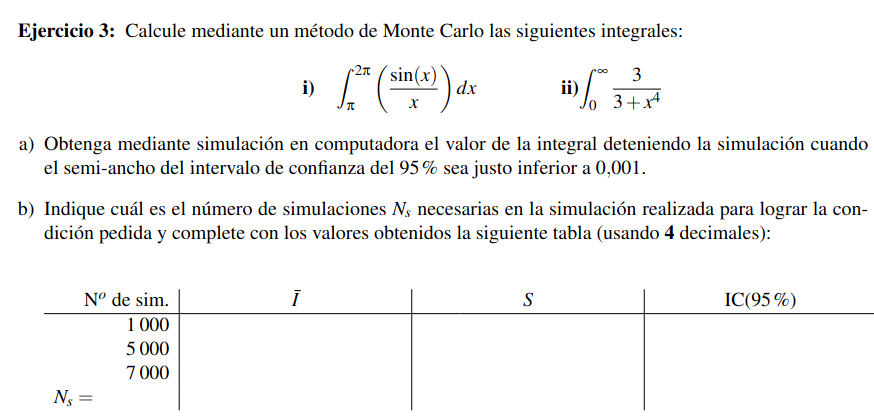

In [60]:
from random import random, seed
import numpy as np
from scipy.integrate import quad
from scipy import stats
import pandas as pd

SEMI_ANCHO = 0.001
LONGITUD_INTERVALO = SEMI_ANCHO * 2
CONFIANZA = 0.95
ALPHA = 1 - CONFIANZA
Z_ALPHA_2 = abs(stats.norm.ppf(ALPHA/2))

def estimar_media_muestreador(muestreador):
  seed(1)
  error_estandar_maximo = LONGITUD_INTERVALO / (2 * Z_ALPHA_2) # maximo error cuadratico medio de la media
  media = next(muestreador)
  Scuad, n = 0, 1
  results = []
  intervalo = 0
  while n <= 100 or np.sqrt(Scuad/n) > error_estandar_maximo:
    n += 1
    nueva_muestra = next(muestreador)
    media_anterior = media
    media = media_anterior + (nueva_muestra - media_anterior) / n
    Scuad = Scuad * (1 - 1 /(n-1)) + n*(media - media_anterior)**2
    intervalo = (media - Z_ALPHA_2*np.sqrt(Scuad / n), media + Z_ALPHA_2*np.sqrt(Scuad / n))

    if n in {1000, 5000, 7000}:
      results.append((n, media, Scuad, intervalo))

  results.append((n, media, Scuad, intervalo))
  return results

In [61]:
# Integrales
def integral_1(x): # entre pi y 2pi
  return np.sin(x)/x

def integral_1p(x): # entre 0 y 1
  a = np.pi
  b = 2 * np.pi
  return integral_1(a + (b - a) * x) * (b - a)

def integral_2(x): # entre 0 e inf
  return 3 / (3 + x**4)

def integral_2p(x): # entre 0 y 1
  return integral_2(1/x - 1) / x**2

longitud_intervalo_1 = 1 - 0
longitud_intervalo_2 = 1 - 0

muestreador_integral_1 = (integral_1p(random()) for _ in iter(int, 1))
muestreador_integral_2 = (integral_2p(random()) for _ in iter(int, 1))

results_1 = estimar_media_muestreador(muestreador_integral_1)
results_2 = estimar_media_muestreador(muestreador_integral_2)

In [62]:
print("Integral 1: ", quad(integral_1, np.pi, 2*np.pi)[0])
print("Integral 2: ", quad(integral_2p, 0, 1)[0])

Integral 1:  -0.4337854758498377
Integral 2:  1.4617906943750605


In [63]:
def crear_cuadro_descriptivo(results):
    ns, medias, Scuads, intervalos = zip(*results)

    Ss = np.sqrt(Scuads)
    long_ic = [i[1] - i[0] for i in intervalos]

    # Redondeo individual antes de crear el DataFrame
    decimales = 4
    medias = np.round(medias, decimales)
    Scuads = np.round(Scuads, decimales)
    Ss = np.round(Ss, decimales)
    long_ic = np.round(long_ic, decimales)
    intervalos = [tuple(np.round(i, decimales)) for i in intervalos]

    df = pd.DataFrame({
        "n": ns,
        "Integral": medias,
        "Scuad": Scuads,
        "S": Ss,
        "IC (95%)": intervalos,
        "Long. IC": long_ic
    })

    return df

df_1 = crear_cuadro_descriptivo(results_1)
df_1

,n,Integral,Scuad,S,IC (95%),Long. IC
0,1000,-0.4297,0.0459,0.2143,"(-0.443, -0.4164)",0.0266
1,5000,-0.4302,0.0454,0.2130,"(-0.4361, -0.4243)",0.0118
2,7000,-0.4315,0.0451,0.2123,"(-0.4364, -0.4265)",0.0099
3,170724,-0.4335,0.0444,0.2108,"(-0.4345, -0.4325)",0.0020


In [64]:
df_2 = crear_cuadro_descriptivo(results_2)
df_2

,n,Integral,Scuad,S,IC (95%),Long. IC
0,1000,1.4865,0.9277,0.9632,"(1.4268, 1.5462)",0.1194
1,5000,1.4540,0.9519,0.9757,"(1.427, 1.4811)",0.0541
2,7000,1.4630,0.9553,0.9774,"(1.4401, 1.4859)",0.0458
3,3663298,1.4615,0.9536,0.9765,"(1.4605, 1.4625)",0.0020
